This problem can be solved by a large number of methods. I suggest that you pursue a computational
approach. That is implement classes or functions that simulate the outcomes in control and treatment
arms; implement a class or function that performs a permutation test; and determine the probability of a
statistically significant difference at α = 0.05 level for a few values of N. Based on that plot, determine a
suitable value of N that the problem asks for. Then perform simulations at this N and confirm that there is
indeed about 90% chance that the trial passes the statistical test.

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt

def sim(N):
    #simulates one round of outcomes with sample size N
    cinfected = []
    tinfected = []
    
    for i in range(N):
        n1 = random.random()
        if n1 > 0.5:
            cinfected.append(1)
        else:
            cinfected.append(0)
        n2 = random.random()
        if n2 > 0.1:
            tinfected.append(1)
        else:
            tinfected.append(0)
    
    return cinfected, tinfected

def perm(N):
    #does a permutation test with 3000 shuffles and returns the p value 
    c, t = sim(N)
    n = len(c)
    pv = []
    diff = (sum(t)/len(t)) - (sum(c)/len(c))
    l = np.concatenate([c, t])
    for j in range(3000):
        np.random.shuffle(l)
        pv.append(np.abs(np.mean(l[:n]) - np.mean(l[n:])))
    count = 0
    for i in pv :
        if i >= diff:
            count += 1
    return  count/len(pv)

def stat(N):
    #calculates the probability that there will be a statistically significant difference 
    a = 0
    b = 0
    for i in range(100):
        pval = perm(N)
        if pval < 0.05:
            a += 1
        else:
            b += 1
    return a/100


In [54]:
#determines the probabilities for several values of N
sizes = [20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]
sp = []
for i in sizes:
    sp.append(stat(i))
sp

[0.74,
 0.72,
 0.84,
 0.91,
 0.92,
 0.89,
 0.92,
 0.95,
 0.97,
 0.97,
 0.97,
 0.97,
 0.98,
 1.0,
 0.98,
 0.98]

<BarContainer object of 16 artists>

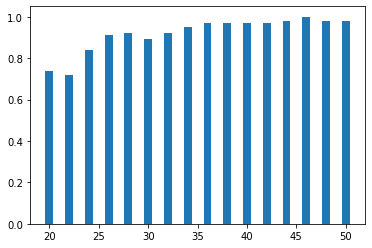

In [55]:
#bar graph of results
plt.bar(sizes,sp)

In [66]:
# a sample size of N = 32 fulfills the requirements of 90% chance of passing the statistical test. 
print(stat(32))

0.93
